In [63]:
import pandas as pd
import matplotlib.pyplot as plt

센서 값에 따른 자료특성 변화

In [93]:
#my_url= "April_sensor_data.csv"
my_url= "April_All.csv"

#data frame
df = pd.read_csv(my_url, parse_dates=['REG_DATE'])

In [94]:
df.shape

(36811, 8)

In [95]:
df.head()

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
0,1,2020-04-02 00:00:00,7.54,6.19,21.6,22.1,1.86,4.16
1,2,2020-04-02 00:01:00,7.83,6.19,21.6,22.1,1.85,4.15
2,3,2020-04-02 00:02:00,7.54,6.19,21.6,22.1,1.86,4.20
3,4,2020-04-02 00:03:00,7.83,6.19,21.5,22.1,1.81,4.17
4,5,2020-04-02 00:04:00,8.12,6.19,21.6,22.1,1.85,4.20


In [97]:
df['ds'] = df['REG_DATE']

In [98]:
df.nlargest(10, columns='PM2.5')

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds
1907,1908,2020-04-03 07:47:00,74.57,55.71,20.1,29.8,2.19,5.23,2020-04-03 07:47:00
2125,2126,2020-04-03 11:25:00,71.38,61.90,21.6,26.1,1.90,4.94,2020-04-03 11:25:00
2110,2111,2020-04-03 11:10:00,68.77,55.71,22.4,25.0,1.97,4.96,2020-04-03 11:10:00
3310,3311,2020-04-04 07:10:00,67.03,55.71,20.3,32.0,2.38,5.72,2020-04-04 07:10:00
2136,2137,2020-04-03 11:36:00,65.00,55.71,21.9,25.7,2.01,4.97,2020-04-03 11:36:00
1862,1863,2020-04-03 07:02:00,64.70,49.52,20.2,29.1,2.19,5.13,2020-04-03 07:02:00
2129,2130,2020-04-03 11:29:00,62.96,55.71,21.6,25.8,1.91,4.98,2020-04-03 11:29:00
2068,2069,2020-04-03 10:28:00,61.51,49.52,22.3,25.8,1.97,5.19,2020-04-03 10:28:00
2113,2114,2020-04-03 11:13:00,61.51,55.71,22.2,25.1,1.92,4.92,2020-04-03 11:13:00
1885,1886,2020-04-03 07:25:00,61.22,49.52,20.1,29.4,2.17,5.19,2020-04-03 07:25:00


In [99]:
df.nsmallest(10, columns='PM2.5')

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds
26275,26276,2020-04-20 05:55:00,1.02,1.02,20.3,39.4,1.51,7.08,2020-04-20 05:55:00
26246,26247,2020-04-20 05:26:00,1.03,1.03,20.3,39.7,1.54,7.09,2020-04-20 05:26:00
26302,26303,2020-04-20 06:22:00,1.04,1.04,20.3,39.3,1.47,7.10,2020-04-20 06:22:00
26262,26263,2020-04-20 05:42:00,1.05,1.05,20.4,39.5,1.52,7.08,2020-04-20 05:42:00
26308,26309,2020-04-20 06:28:00,1.06,1.06,20.3,39.4,1.48,7.04,2020-04-20 06:28:00
26332,26333,2020-04-20 06:52:00,1.12,1.12,20.3,39.5,1.48,7.06,2020-04-20 06:52:00
26256,26257,2020-04-20 05:36:00,1.14,1.14,20.3,39.6,1.51,7.06,2020-04-20 05:36:00
26271,26272,2020-04-20 05:51:00,1.14,1.14,20.3,39.5,1.50,7.10,2020-04-20 05:51:00
26300,26301,2020-04-20 06:20:00,1.14,1.14,20.3,39.3,1.49,7.08,2020-04-20 06:20:00
26201,26202,2020-04-20 04:41:00,1.15,1.15,20.4,40.2,1.56,7.16,2020-04-20 04:41:00


In [6]:
#df['y'] = df['Huminity']

In [100]:
#df['y'] = df['PM2.5']
df['y'] = df['CO2']

In [101]:
df.nlargest(20, columns='PM25')

KeyError: 'PM25'

In [102]:
df.columns

Index(['NO', 'REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC',
       'CO2', 'ds', 'y'],
      dtype='object')

In [103]:
from fbprophet import Prophet 
m = Prophet()
m.fit(df)

In [104]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [107]:
future = m.make_future_dataframe(periods=50)
future.tail()

,ds
36856,2020-06-12 13:30:00
36857,2020-06-13 13:30:00
36858,2020-06-14 13:30:00
36859,2020-06-15 13:30:00
36860,2020-06-16 13:30:00


In [108]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
36856,2020-06-12 13:30:00,32.120651,-802.091565,823.443593,-802.756464,822.923661,0.154716,0.154716,0.154716,0.025963,0.025963,0.025963,0.128753,0.128753,0.128753,0.0,0.0,0.0,32.275368
36857,2020-06-13 13:30:00,32.684919,-839.379119,851.619553,-840.022458,850.876999,0.611633,0.611633,0.611633,0.025963,0.025963,0.025963,0.585669,0.585669,0.585669,0.0,0.0,0.0,33.296552
36858,2020-06-14 13:30:00,33.249187,-859.746079,877.282656,-859.404212,878.409651,-0.828636,-0.828636,-0.828636,0.025963,0.025963,0.025963,-0.854599,-0.854599,-0.854599,0.0,0.0,0.0,32.420552
36859,2020-06-15 13:30:00,33.813455,-890.422869,907.544718,-890.625903,908.146695,-0.140980,-0.140980,-0.140980,0.025963,0.025963,0.025963,-0.166944,-0.166944,-0.166944,0.0,0.0,0.0,33.672475
36860,2020-06-16 13:30:00,34.377723,-907.378921,938.257619,-907.245106,937.857226,0.356712,0.356712,0.356712,0.025963,0.025963,0.025963,0.330749,0.330749,0.330749,0.0,0.0,0.0,34.734435


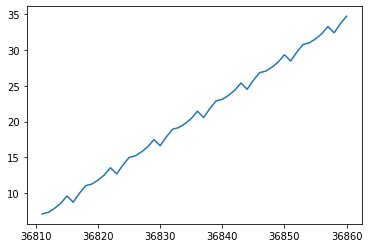

In [111]:
forecast.iloc[-50:, :].yhat.plot()

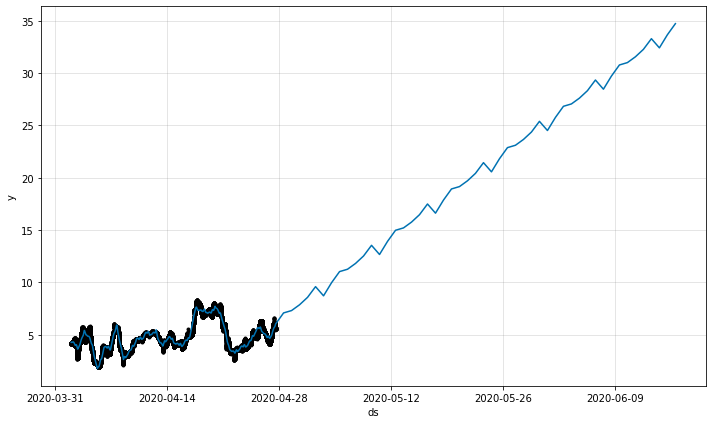

In [112]:
fig1 = m.plot(forecast, uncertainty=False)
plt.show()

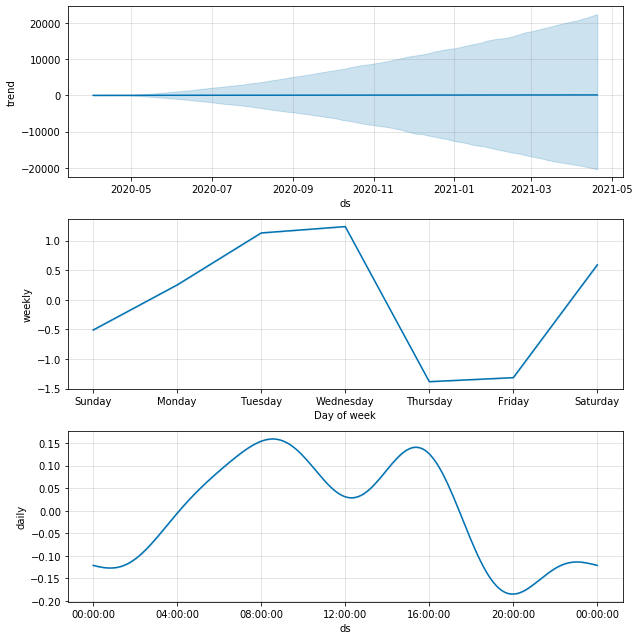

In [88]:
fig2 = m.plot_components(forecast)
plt.show()

In [89]:
# index 컬럼 지정 
df = df.set_index("NO", drop = True)

df['weekday'] = df['REG_DATE'].dt.day_name()
print(df.columns)

Index(['REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC', 'CO2',
       'ds', 'y', 'weekday'],
      dtype='object')


In [90]:
df.shape

(25920, 10)

In [91]:
df.head(3)

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds,y,weekday
NO,,,,,,,,,,
1,2020-04-02 00:00:00,7.54,6.19,21.6,22.1,1.86,4.16,2020-04-02 00:00:00,4.16,Thursday
2,2020-04-02 00:01:00,7.83,6.19,21.6,22.1,1.85,4.15,2020-04-02 00:01:00,4.15,Thursday
3,2020-04-02 00:02:00,7.54,6.19,21.6,22.1,1.86,4.20,2020-04-02 00:02:00,4.20,Thursday


In [92]:
df_monday = df[df['weekday']=='Monday']
df_monday.tail()

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds,y,weekday
NO,,,,,,,,,,
17276,2020-04-13 23:55:00,11.32,12.38,19.5,25.4,2.04,4.27,2020-04-13 23:55:00,4.27,Monday
17277,2020-04-13 23:56:00,12.19,12.38,19.6,25.4,2.04,4.29,2020-04-13 23:56:00,4.29,Monday
17278,2020-04-13 23:57:00,12.48,12.38,19.6,25.4,2.07,4.24,2020-04-13 23:57:00,4.24,Monday
17279,2020-04-13 23:58:00,10.74,12.38,19.6,25.4,2.06,4.28,2020-04-13 23:58:00,4.28,Monday
17280,2020-04-13 23:59:00,11.03,12.38,19.6,25.4,2.04,4.30,2020-04-13 23:59:00,4.30,Monday


In [20]:
df_monday = df[df['weekday']=='Monday']
df_tuesday = df[df['weekday']=='Tuesday']
df_wednesday = df[df['weekday']=='Wednesday']
df_thursday = df[df['weekday']=='Thursday']
df_friday = df[df['weekday']=='Friday']

df_saturday = df[df['weekday']=='Saturday']
df_sunday = df[df['weekday']=='Sunday']


In [21]:
df_sunday.shape

(4320, 10)

In [22]:
df_sunday.tail()

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds,y,weekday
NO,,,,,,,,,,
25916,2020-04-19 23:55:00,4.35,4.35,20.6,42.3,1.76,7.70,2020-04-19 23:55:00,4.35,Sunday
25917,2020-04-19 23:56:00,4.21,4.22,20.6,42.3,1.78,7.69,2020-04-19 23:56:00,4.21,Sunday
25918,2020-04-19 23:57:00,5.07,5.07,20.6,42.3,1.76,7.66,2020-04-19 23:57:00,5.07,Sunday
25919,2020-04-19 23:58:00,3.90,3.90,20.6,42.3,1.77,7.71,2020-04-19 23:58:00,3.90,Sunday
25920,2020-04-19 23:59:00,4.64,4.64,20.6,42.3,1.74,7.70,2020-04-19 23:59:00,4.64,Sunday


In [23]:

df_workday = pd.concat([df_monday,df_tuesday, df_wednesday, df_thursday, df_friday])
df_weekend = pd.concat([df_saturday,df_sunday])
#df_weekend = pd.concat([df_saturday])

In [24]:
df_weekend.shape

(8640, 10)

In [25]:
df_workday.describe()

,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,y
count,17280.000000,17280.000000,17280.000000,17280.000000,17279.000000,17279.000000,17280.000000
mean,14.795528,14.822488,20.295770,25.242321,2.088653,4.455054,14.795528
std,7.727320,7.411921,1.169316,5.078978,0.290255,1.038293,7.727320
min,3.480000,6.190000,18.100000,15.000000,1.100000,2.150000,3.480000
25%,9.870000,12.380000,19.300000,22.300000,1.930000,3.840000,9.870000
50%,13.060000,12.380000,20.200000,24.500000,2.060000,4.310000,13.060000
75%,18.080000,18.570000,21.000000,26.800000,2.230000,4.880000,18.080000
max,74.570000,61.900000,25.200000,43.300000,6.860000,8.310000,74.570000


In [26]:
df_weekend.describe()

,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,y
count,8640.000000,8640.000000,8639.000000,8639.000000,8640.000000,8640.000000,8640.000000
mean,11.999606,11.973071,20.154786,29.661824,1.901799,5.217382,11.999606
std,8.427809,7.610504,0.765153,8.768501,0.219557,1.781602,8.427809
min,1.480000,0.000000,18.600000,13.300000,1.440000,1.880000,1.480000
25%,6.670000,6.190000,19.500000,23.700000,1.770000,3.940000,6.670000
50%,10.440000,11.840000,20.300000,30.500000,1.880000,5.160000,10.440000
75%,13.930000,12.380000,20.800000,37.300000,2.020000,6.930000,13.930000
max,67.030000,55.710000,22.000000,43.400000,2.470000,8.020000,67.030000


In [27]:
df_workday.head()

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds,y,weekday
NO,,,,,,,,,,
5761,2020-04-06 00:00:00,7.83,6.19,19.1,23.8,1.95,3.92,2020-04-06 00:00:00,7.83,Monday
5762,2020-04-06 00:01:00,7.83,6.19,19.1,23.8,1.94,3.89,2020-04-06 00:01:00,7.83,Monday
5763,2020-04-06 00:02:00,8.12,6.19,19.1,23.9,1.92,3.92,2020-04-06 00:02:00,8.12,Monday
5764,2020-04-06 00:03:00,10.16,12.38,19.1,23.8,1.91,3.91,2020-04-06 00:03:00,10.16,Monday
5765,2020-04-06 00:04:00,11.90,12.38,19.1,23.9,1.93,3.95,2020-04-06 00:04:00,11.90,Monday


### group by a single column
df.groupby('column1')

In [28]:
df.groupby('weekday')

In [29]:
week_df = df.groupby(df['weekday']).mean()

In [30]:
week_df

,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,y
weekday,,,,,,,
Friday,17.002421,16.502553,20.953241,29.277060,2.243400,5.413275,17.002421
Monday,8.378153,8.730479,19.610347,23.084792,1.949441,3.890170,8.378153
Saturday,13.114808,13.139979,20.404168,30.553508,1.986215,5.449787,13.114808
Sunday,10.884405,10.806162,19.905463,28.770347,1.817382,4.984977,10.884405
Thursday,15.080028,15.104558,20.793750,22.629282,2.072097,4.080234,15.080028
Tuesday,13.542538,13.804740,19.885139,28.634375,2.186941,4.935684,13.542538
Wednesday,18.728806,18.989042,19.658646,21.875243,1.922243,3.664010,18.728806


In [31]:
df.groupby('weekday').groups

{'Friday': Int64Index([ 1441,  1442,  1443,  1444,  1445,  1446,  1447,  1448,  1449,
              1450,
             ...
             23031, 23032, 23033, 23034, 23035, 23036, 23037, 23038, 23039,
             23040],
            dtype='int64', name='NO', length=4320),
 'Monday': Int64Index([ 5761,  5762,  5763,  5764,  5765,  5766,  5767,  5768,  5769,
              5770,
             ...
             17271, 17272, 17273, 17274, 17275, 17276, 17277, 17278, 17279,
             17280],
            dtype='int64', name='NO', length=2880),
 'Saturday': Int64Index([ 2881,  2882,  2883,  2884,  2885,  2886,  2887,  2888,  2889,
              2890,
             ...
             24471, 24472, 24473, 24474, 24475, 24476, 24477, 24478, 24479,
             24480],
            dtype='int64', name='NO', length=4320),
 'Sunday': Int64Index([ 4321,  4322,  4323,  4324,  4325,  4326,  4327,  4328,  4329,
              4330,
             ...
             25911, 25912, 25913, 25914, 25915, 25916, 2591

In [32]:
df_workday = df_workday.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [33]:
df_weekend = df_weekend.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [34]:
df_weekend.columns

Index(['REG_DATE', 'PM25', 'PM100', 'Temperature', 'Humidity', 'TVOC', 'CO2',
       'ds', 'y', 'weekday'],
      dtype='object')

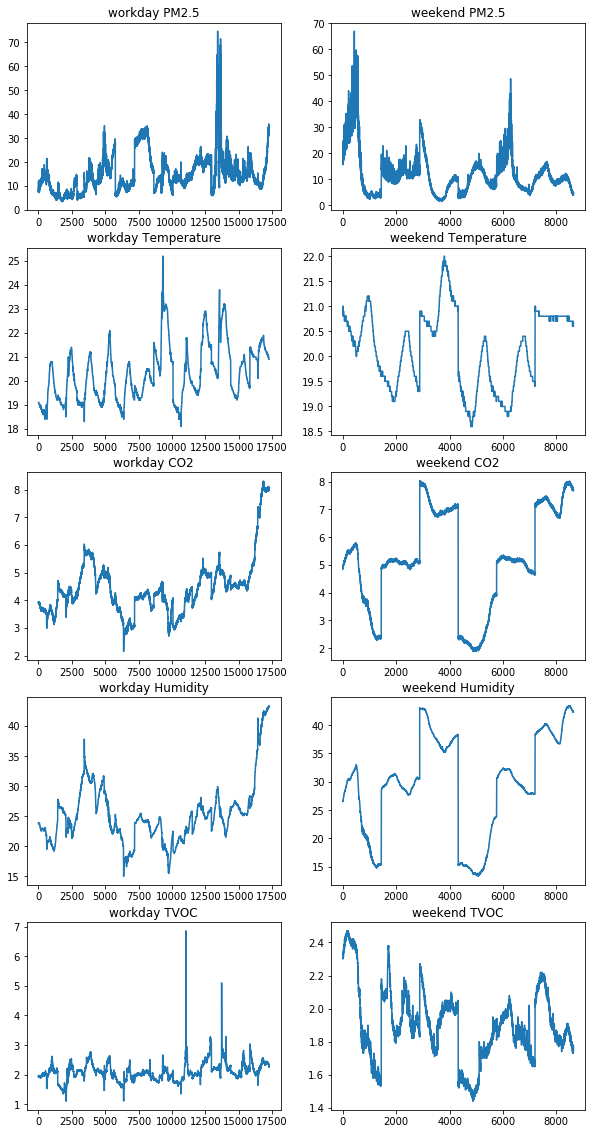

In [35]:
fig, axes = plt.subplots(5,2, figsize=(10,20))
x  = list(range(len(df_workday['PM25'])))
axes[0][0].plot(x, df_workday['PM25'])
axes[0][0].set_title ('workday PM2.5')

x1  = list(range(len(df_weekend['PM25'])))
axes[0][1].plot(x1, df_weekend['PM25'])
axes[0][1].set_title ('weekend PM2.5') 


axes[1][0].plot(x, df_workday['Temperature'])
axes[1][0].set_title ('workday Temperature')

axes[1][1].plot(x1, df_weekend['Temperature'])
axes[1][1].set_title ('weekend Temperature') 

axes[2][0].plot(x, df_workday['CO2'])
axes[2][0].set_title ('workday CO2')

axes[2][1].plot(x1, df_weekend['CO2'])
axes[2][1].set_title ('weekend CO2') 

axes[3][0].plot(x, df_workday['Humidity'])
axes[3][0].set_title ('workday Humidity')

axes[3][1].plot(x1, df_weekend['Humidity'])
axes[3][1].set_title ('weekend Humidity') 

axes[4][0].plot(x, df_workday['TVOC'])
axes[4][0].set_title ('workday TVOC')

axes[4][1].plot(x1, df_weekend['TVOC'])
axes[4][1].set_title ('weekend TVOC') 

plt.show()

In [36]:
import numpy as np

def is_outlier(points, threshold=1):
    if len(points.shape) == 1:
        points = points[:, None]
    
    median = np.median(points, axis=0)
    
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    
    return modified_z_score > threshold



In [37]:
df_workday['PM25'].shape

(17280,)

In [38]:
filtered = df_workday[~is_outlier(df_workday['PM25'])]

filtered.head()

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2,ds,y,weekday
NO,,,,,,,,,,
5761,2020-04-06 00:00:00,7.83,6.19,19.1,23.8,1.95,3.92,2020-04-06 00:00:00,7.83,Monday
5762,2020-04-06 00:01:00,7.83,6.19,19.1,23.8,1.94,3.89,2020-04-06 00:01:00,7.83,Monday
5763,2020-04-06 00:02:00,8.12,6.19,19.1,23.9,1.92,3.92,2020-04-06 00:02:00,8.12,Monday
5764,2020-04-06 00:03:00,10.16,12.38,19.1,23.8,1.91,3.91,2020-04-06 00:03:00,10.16,Monday
5765,2020-04-06 00:04:00,11.90,12.38,19.1,23.9,1.93,3.95,2020-04-06 00:04:00,11.90,Monday


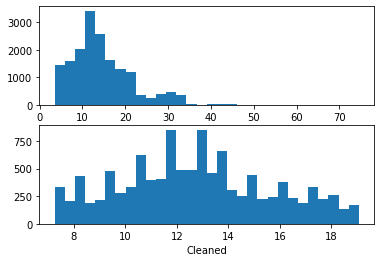

In [39]:
buckets=30

plt.figure()

plt.subplot(211)
plt.hist(df_workday['PM25'], buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered['PM25'], buckets)
plt.xlabel('Cleaned')

plt.show()


In [40]:
filtered1 = df_weekend[~is_outlier(df_weekend['PM25'])]

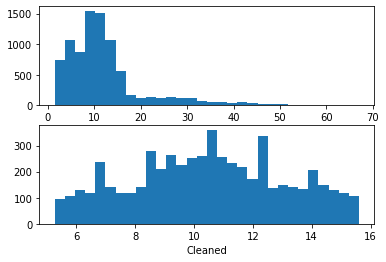

In [41]:
buckets=30

plt.figure()

plt.subplot(211)
plt.hist(df_weekend['PM25'], buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered1['PM25'], buckets)
plt.xlabel('Cleaned')

plt.show()

In [42]:
filtered = df_weekend[~is_outlier(df_weekend['CO2'])]
filtered1 = df_workday[~is_outlier(df_workday['CO2'])]

C:\Users\yhkan\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


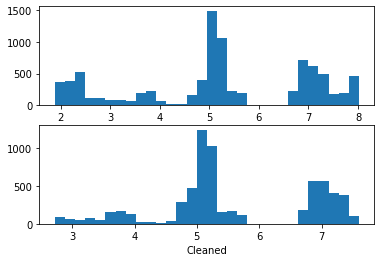

In [43]:
buckets=30
sensor_name = 'CO2'
plt.figure()

plt.subplot(211)
plt.hist(df_weekend[sensor_name], buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered[sensor_name], buckets)
plt.xlabel('Cleaned')

plt.show()

C:\Users\yhkan\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yhkan\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


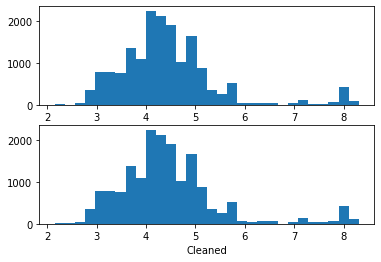

In [44]:
buckets=30
sensor_name = 'CO2'
plt.figure()

plt.subplot(211)
plt.hist(df_workday[sensor_name], buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered1[sensor_name], buckets)
plt.xlabel('Cleaned')

plt.show()

In [45]:
from pylab import *
def moving_average(interval, window_size):
    window = ones(int(window_size)) / float(window_size)
    return convolve(interval, window, 'same')

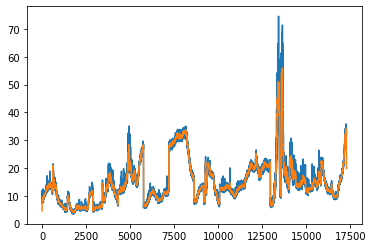

In [46]:
x  = list(range(len(df_workday['PM25'])))
plt.plot(x, df_workday['PM25'])
 

y_av = moving_average(df_workday['PM25'],10)
plt.plot(x, y_av)

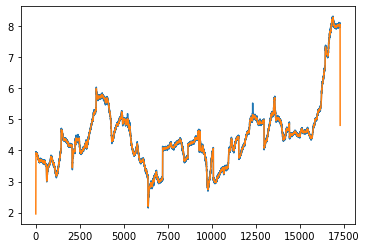

In [47]:
 
x  = list(range(len(df_workday['CO2'])))
plt.plot(x, df_workday['CO2'])
 

y_av = moving_average(df_workday['CO2'],10)
plt.plot(x, y_av)

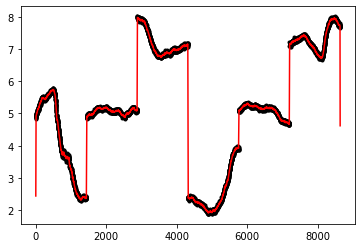

In [48]:
x  = list(range(len(df_weekend['CO2'])))
plt.plot(x, df_weekend['CO2'], 'k.')
 

y_av = moving_average(df_weekend['CO2'],10)
plt.plot(x, y_av, 'r')

!pip install fbprophet

In [49]:
from fbprophet import Prophet 

In [50]:
import pandas as pd

url = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"
df = pd.read_csv(url)
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [51]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [52]:
m = Prophet()
m.fit(df)

In [53]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [54]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.190587,7.513267,8.928310,6.841600,7.535413,1.018043,1.018043,1.018043,0.048285,0.048285,0.048285,0.969757,0.969757,0.969757,0.0,0.0,0.0,8.208630
3266,2017-01-16,7.189564,7.769021,9.223521,6.841239,7.536163,1.344084,1.344084,1.344084,0.352288,0.352288,0.352288,0.991796,0.991796,0.991796,0.0,0.0,0.0,8.533648
3267,2017-01-17,7.188540,7.626192,9.050530,6.840902,7.536372,1.132525,1.132525,1.132525,0.119634,0.119634,0.119634,1.012891,1.012891,1.012891,0.0,0.0,0.0,8.321065
3268,2017-01-18,7.187516,7.492070,8.847060,6.838673,7.535989,0.966176,0.966176,0.966176,-0.066664,-0.066664,-0.066664,1.032840,1.032840,1.032840,0.0,0.0,0.0,8.153693
3269,2017-01-19,7.186493,7.476408,8.865449,6.836444,7.535699,0.979138,0.979138,0.979138,-0.072261,-0.072261,-0.072261,1.051398,1.051398,1.051398,0.0,0.0,0.0,8.165630


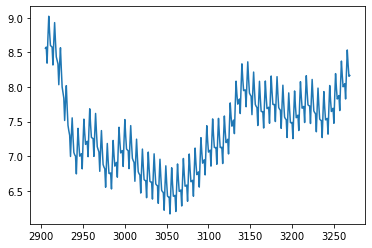

In [55]:
forecast.iloc[-365:, :].yhat.plot()

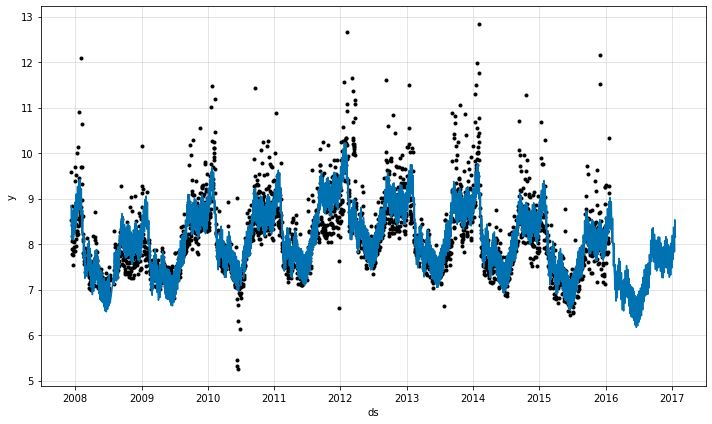

In [56]:
import matplotlib.pyplot as plt
fig1 = m.plot(forecast, uncertainty=False)
plt.show()

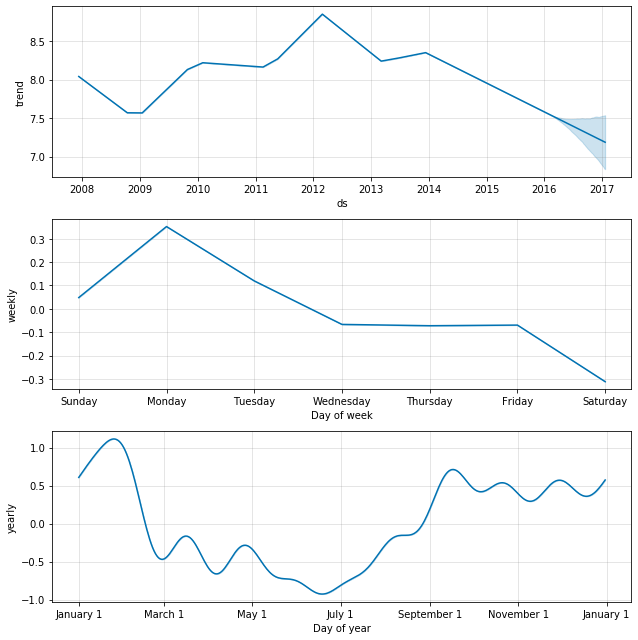

In [57]:
fig2 = m.plot_components(forecast)
plt.show()